                     MACHINE LEARNING PRACTICAL FILE CS-601 DEEPALI KULSHRESTHA (0905CS181054)

In [ ]:
1.Write a program to implement the Linear Regression Algorithm.

In [111]:
import pandas as pd
data=pd.read_csv('tip.csv')
print(data)
print('DEEPALI KULSHRESTHA (0905CS181054)')

     total_bill   tip
0         16.99  1.01
1         10.34  1.66
2         21.01  3.50
3         23.68  3.31
4         24.59  3.61
..          ...   ...
239       29.03  5.92
240       27.18  2.00
241       22.67  2.00
242       17.82  1.75
243       18.78  3.00

[244 rows x 2 columns]
DEEPALI KULSHRESTHA (0905CS181054)


In [112]:
data=pd.read_csv('tip.csv',na_values=['##','####'])
data

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [113]:
data.isnull().sum()

total_bill    0
tip           0
dtype: int64

In [114]:
data=data.apply(lambda x:x.fillna(x.mean()) if x.dtypes=='float' else x.fillna(x.value_counts().index[0]))
data

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [115]:
data.shape

(244, 2)

In [116]:
data.dtypes

total_bill    float64
tip           float64
dtype: object

In [117]:
features=data.iloc[:,1:2].values
labels=data.iloc[:,0:1].values

In [118]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(features,labels)

LinearRegression()

In [119]:
print(regressor.coef_)
print(regressor.intercept_)
#y=mx+c

[[4.34771421]]
[6.75028377]


In [120]:
total_bill = regressor.coef_*1.75+regressor.intercept_
print(total_bill)

[[14.35878363]]


In [121]:
import numpy as np
x=[1.75]
x=np.array(x)
x=x.reshape(1,1)
print(regressor.predict(x))

[[14.35878363]]


In [122]:
print('Accuracy of train data:',regressor.score(features,labels))

Accuracy of train data: 0.45661658635167635


2. Write a program to implement Polynomial Regression Algorithm.

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('data.csv')
print(data)
print('DEEPALI KULSHRESTHA (0905CS181054)')

   sno  Temperature  Pressure
0    1            0    0.0002
1    2           20    0.0012
2    3           40    0.0060
3    4           60    0.0300
4    5           80    0.0900
5    6          100    0.2700
DEEPALI KULSHRESTHA (0905CS181054)


In [126]:
x=data.iloc[:,1:2].values
y=data.iloc[:, 2].values

In [127]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
  
lin.fit(x, y)

LinearRegression()

In [128]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(x)
  
poly.fit(x_poly, y)
lin2 = LinearRegression()
lin2.fit(x_poly, y)

LinearRegression()

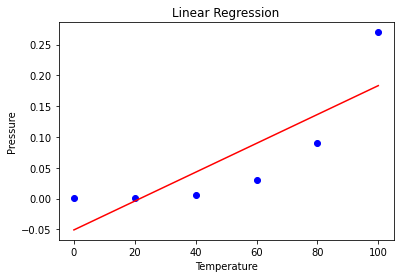

In [129]:
#Visulaizing the result for Linear Regression model  
plt.scatter(x, y, color = 'blue')
  
plt.plot(x, lin.predict(x), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
  
plt.show()

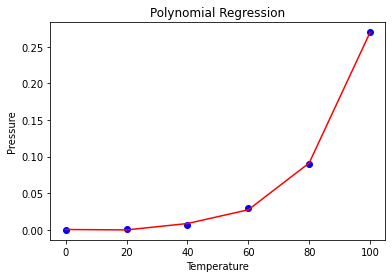

In [130]:
#Visulaizing the result for Polynomial Regression  
plt.scatter(x, y, color = 'blue')
  
plt.plot(x, lin2.predict(poly.fit_transform(x)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
  
plt.show()

In [131]:
lin_pred = lin.predict([[110.0]])  
print(lin_pred)  


[0.20675333]


In [132]:
poly_pred = lin2.predict(poly.fit_transform([[110.0]]))  
print(poly_pred)  

[0.43295877]


3.Write a program to implement Logistic Regression in Classification.

In [133]:
import pandas as pd
dataset=pd.read_csv('User_Data.csv')
print(dataset)
print('DEEPALI KULSHRESTHA (0905CS181054)')

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]
DEEPALI KULSHRESTHA (0905CS181054)


In [134]:
# input
x = dataset.iloc[:, [2, 3]].values

# output
y = dataset.iloc[:, 4].values

In [135]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [136]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [137]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[65  3]
 [ 8 24]]


In [138]:
#Performance measure – Accuracy

from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.89


4.Write a program to implement Random Forest Regression Algorithm.

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [140]:
data=pd.read_csv('Position_Salaries.csv')
data.head()
print('DEEPALI KULSHRESTHA (0905CS181054)')

DEEPALI KULSHRESTHA (0905CS181054)


In [141]:
x = data.iloc[:, 1:2].values 
y = data.iloc[:, 2].values
print(x)                  
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [142]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  # fit the regressor with x and y data
regressor.fit(x, y)   

RandomForestRegressor(random_state=0)

In [143]:
Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))  # test the output by changing values

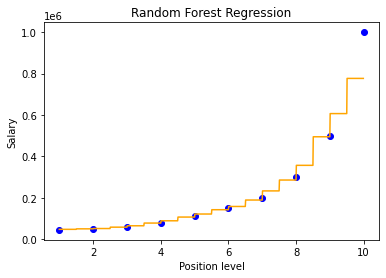

In [144]:
# Visualising the Random Forest Regression results
#arange for creating a range of values from min value of x to max  value of x with a difference of 0.01 between two consecutive values
X_grid = np.arange(min(x), max(x), 0.01) 
# reshape for reshaping the data into a len(X_grid)*1 array, i.e. to make a column out of the X_grid value                  
X_grid = X_grid.reshape((len(X_grid), 1))
# Scatter plot for original data
plt.scatter(x, y, color = 'blue')                                                 
  # plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), 
         color = 'orange') 
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [145]:
regressor.score(x,y)                                                      

0.9378393331453065

4.	Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.

In [146]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
data = pd.read_csv('User_Data.csv')
data.head()
print('DEEPALI KULSHRESTHA (0905CS181054)')

DEEPALI KULSHRESTHA (0905CS181054)


In [147]:
X= data[['Age','EstimatedSalary' ]]
y= data['Purchased']

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [149]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [150]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [151]:
#prediction
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [152]:
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.91


In [153]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

5.	Build an Artificial Neural Network by implementing the Back-propagation algorithm and test the same using appropriate data sets.

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd


In [33]:
df=pd.read_csv('/content/insurance_data.csv')
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


#Split train and test set

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)


#Preprocessing: Scale the data so that both age and affordibility are in same scaling range

In [35]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100


X_train_scaled

,age,affordibility
13,0.39,1
55,0.37,1
37,0.65,1
34,0.41,0
26,0.75,1
57,0.67,0
38,0.66,1
43,0.80,0
29,0.32,1
48,0.56,0


#Model Building: First build a model in keras/tensorflow and see what weights and bias values it comes up with. Below is the architecture of our simple neural network

In [36]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5000)

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
2/2 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.5818
Epoch 2502/5000
2/2 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5818
Epoch 2503/5000
2/2 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.5818
Epoch 2504/5000
2/2 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5818
Epoch 2505/5000
2/2 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5818
Epoch 2506/5000
2/2 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5818
Epoch 2507/5000
2/2 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5818
Epoch 2508/5000
2/2 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.5818
Epoch 2509/5000
2/2 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5818
Epoch 2510/5000
2/2 [===================


x1   x2     y
2     8     12
3     27    30
4     64    68
5     125             y=w1*x+w2x2+b





#Evaluate the model on test set

In [37]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 98ms/step - loss: 0.7016 - accuracy: 0.5000


[0.7016437649726868, 0.5]

In [38]:
model.predict(X_test_scaled)

array([[0.5590455 ],
       [0.46970817],
       [0.47011897],
       [0.5583775 ],
       [0.559481  ],
       [0.47044176],
       [0.470207  ],
       [0.47008964],
       [0.5591036 ],
       [0.47073525],
       [0.5584066 ],
       [0.47044176],
       [0.5597133 ],
       [0.5583775 ]], dtype=float32)

In [39]:

y_test

19    0
0     0
14    1
33    0
67    0
64    1
7     0
17    1
40    1
12    0
35    0
66    0
46    1
30    1
Name: bought_insurance, dtype: int64

#Now get the value of weights and bias from the model

In [40]:
coef, intercept = model.get_weights()

In [41]:

coef, intercept

(array([[ 0.01177956],
        [-0.35448223]], dtype=float32), array([0.23057489], dtype=float32))

# This means w1=.01, w2=-0.3, bias =0.2

In [42]:

def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))
sigmoid(22)

0.9999999997210531

In [30]:
X_test

,age,affordibility
19,57,0
0,22,1
14,36,1
33,34,0
67,72,0
64,47,1
7,39,1
17,35,1
40,59,0
12,57,1


In [ ]:
6.	Write a program to implement the naïve Bayesian classifier for a sample training data set stored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets. 

In [154]:
#Import important libraries 
import numpy as np
import pandas as pd

#Import dataset 
from sklearn.datasets import load_iris
#load dataset
data = load_iris()
data
print('DEEPALI KULSHRESTHA (0905CS181054)')

DEEPALI KULSHRESTHA (0905CS181054)


In [155]:
data.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [156]:
x=data.data
y=data.target

In [157]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [158]:
#Import Gaussian Naive Bayes model

from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(x_train, y_train)

GaussianNB()

In [159]:
#Predict the response for test dataset
y_pred = gnb.predict(x_test)

In [160]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy
print("Model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Model accuracy(in %): 96.66666666666667


In [161]:
#confusion matrix 
from sklearn.metrics import  confusion_matrix
cm=np.array(confusion_matrix(y_test,y_pred))
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using k-Means algorithm. 

In [162]:
#Imported libraries and dataset

from sklearn import datasets

from sklearn.cluster import KMeans

from sklearn.utils import shuffle

import numpy as np

import pandas as pd

In [163]:
#Loading iris dataset and defining the our target and data
iris=datasets.load_iris()
X=iris.data

Y=iris.target

#Shuffle of Data 

X,Y = shuffle(X,Y)
print('DEEPALI KULSHRESTHA (0905CS181054)')

DEEPALI KULSHRESTHA (0905CS181054)


In [164]:
#Defining model 

model=KMeans(n_clusters=3,init='k-means++',max_iter=10,n_init=1,verbose=0,random_state=3425)

In [165]:
#Training of the model

model.fit(X)

# This is what KMeans thought (Prediction)

Y_Pred=model.labels_

Y_Pred

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 2, 2,
       0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 2, 2, 1, 0, 2,
       2, 2, 0, 0, 0, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 1,
       2, 0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 1, 0,
       2, 1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0,
       2, 1, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1])

In [166]:
#EM Algorithm
#loading data-set for EM algorithm

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)

Y = pd.DataFrame(iris.target)

In [167]:
#Defining EM Model
from sklearn.mixture import GaussianMixture
model2=GaussianMixture(n_components=3,random_state=3425)

#Training of the model

model2.fit(X)

GaussianMixture(n_components=3, random_state=3425)

In [168]:
#Predicting classes for our data

uu= model2.predict(X)

#Accuracy of EM Model

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y,uu)

print(cm)

from sklearn.metrics import accuracy_score

print(accuracy_score(Y,uu))

[[ 0  0 50]
 [45  5  0]
 [ 0 50  0]]
0.03333333333333333


In [169]:
9.Compare the results of these two algorithms and comment on the quality of clustering. 

SyntaxError: invalid syntax (<ipython-input-169-f1e070acd15b>, line 1)

In [170]:
#Imported libraries and dataset

from sklearn import datasets

from sklearn.cluster import KMeans

from sklearn.utils import shuffle

import numpy as np

import pandas as pd

In [171]:
#Loading iris dataset and defining the our target and data
iris=datasets.load_iris()
X=iris.data

Y=iris.target

#Shuffle of Data 

X,Y = shuffle(X,Y)
print('DEEPALI KULSHRESTHA (0905CS181054)')

DEEPALI KULSHRESTHA (0905CS181054)


In [172]:
#Defining model 

model=KMeans(n_clusters=3,init='k-means++',max_iter=10,n_init=1,verbose=0,random_state=3425)

In [173]:
#Training of the model

model.fit(X)

# This is what KMeans thought (Prediction)

Y_Pred=model.labels_

Y_Pred

array([2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1,
       1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1,
       1, 2, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 0, 2,
       2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0, 2, 0,
       1, 1, 0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2, 1, 1, 0, 2, 1, 1, 0, 2,
       1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0])

In [174]:
#Accuracy of KMean model 

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y,Y_Pred)

print(cm)

from sklearn.metrics import accuracy_score

print(accuracy_score(Y,Y_Pred))

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
0.8933333333333333


In [175]:
#EM Algorithm
#loading data-set for EM algorithm

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)

Y = pd.DataFrame(iris.target)

In [176]:
#Defining EM Model
from sklearn.mixture import GaussianMixture
model2=GaussianMixture(n_components=3,random_state=3425)

#Training of the model

model2.fit(X)

GaussianMixture(n_components=3, random_state=3425)

In [177]:
#Predicting classes for our data

uu= model2.predict(X)

#Accuracy of EM Model

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y,uu)

print(cm)

from sklearn.metrics import accuracy_score

print(accuracy_score(Y,uu))

[[ 0  0 50]
 [45  5  0]
 [ 0 50  0]]
0.03333333333333333


10.	Write a program to implement k-Nearest Neighbour algorithm to classify the iris data set. Print both correct and wrong predictions. 

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier


In [91]:
df=pd.read_csv('iris.txt')
print(df)
print('DEEPALI KULSHRESTHA (0905CS181054)')

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]
DEEPALI KULSHRESTHA (0905CS181054)


In [76]:
print(df.head())
print(df.shape)

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
(150, 5)


In [77]:
df['variety'].value_counts()
df.info()
df.describe()
df.describe(include='object')
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


,sepal.length,sepal.width,petal.length,petal.width,variety
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [78]:
x=df.iloc[:,:4]
print(x)
y=df.iloc[:,-1]
print(y)

     sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object


In [79]:
x=preprocessing.StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_test.shape
x_train.shape

(105, 4)

In [81]:
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(x_train,y_train)
y_predict=knnmodel.predict(x_test)

In [82]:
from sklearn.metrics import accuracy_score

print(" correct predicition",accuracy_score(y_test,y_predict))

print(" worng predicition",(1-accuracy_score(y_test,y_predict)))

 correct predicition 0.9777777777777777
 worng predicition 0.022222222222222254


In [83]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_predict) 

print(cm)

[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]
